In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../result.dat", sep="\s+", usecols=lambda column: column not in ["id", "R1", "R4", "R8"])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

df.head()

,R2,R3,R5,R6,R7,Temp.,Humidity,Class
0,-83.570392,-258.673440,-639.506531,-290.246734,-397.796807,10.362845,100.058055,banana
1,-98.093448,-305.494092,-757.303974,-342.964554,-470.827068,11.868958,109.317938,banana
2,-107.113943,-334.510245,-831.609195,-376.111944,-516.449275,12.818591,114.417791,banana
3,-112.004662,-350.270396,-873.016317,-394.358974,-541.613054,13.286713,116.433566,banana
4,-114.407708,-358.105978,-895.266039,-403.831837,-554.733961,13.466170,113.115831,banana


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


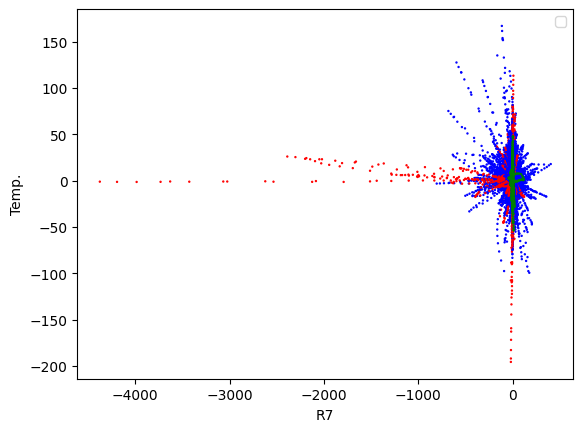

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = 4
y = 5
x_p = df.iloc[:, x]
y_p = df.iloc[:, y]
class_p = df.iloc[:, -1].to_numpy()

colors = {
    "banana": "red",
    "wine": "blue",
    "background": "green"
}

plt.scatter(x_p.to_numpy(), y_p.to_numpy(), c=[colors[i] for i in class_p], s=0.5)

plt.xlabel(x_p.name)
plt.ylabel(y_p.name)

plt.legend()
plt.show()

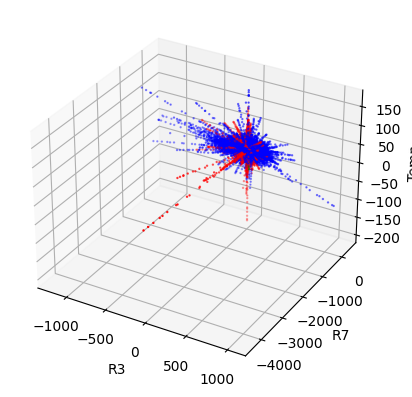

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos de ejemplo
x = 1
y = 4
z = 5
x_p = df.iloc[:, x]
y_p = df.iloc[:, y]
z_p = df.iloc[:, z]
class_p = df.iloc[:, -1].to_numpy()

colors = {
    "banana": "red",
    "wine": "blue",
    "background": "green"
}

# Crear una figura y un eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Pintar los puntos
ax.scatter(x_p, y_p, z_p, c=[colors[i] for i in class_p], s=0.5)

# Agregar etiquetas a los ejes
ax.set_xlabel(x_p.name)
ax.set_ylabel(y_p.name)
ax.set_zlabel(z_p.name)

# Mostrar el gráfico
plt.show()


# Visualizacion de correlacion entre atributos (raw)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../result.dat", sep="\s+", usecols=lambda column: 'raw' in column or 'Clas' in column)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

df.head()

,R1_raw,R2_raw,R3_raw,R4_raw,R5_raw,R6_raw,R7_raw,R8_raw,Temp._raw,Humidity_raw,Class
0,12.6179,10.07860,9.56177,10.60520,11.29100,12.2750,6.93490,7.81553,26.4591,59.8172,banana
1,12.5650,10.00020,9.31464,10.30600,10.67320,11.9968,6.55191,7.47192,26.4683,59.8816,banana
2,12.5222,9.93583,9.11289,10.05980,10.16490,11.7678,6.23840,7.19063,26.4759,59.9342,banana
3,12.4872,9.88330,8.94814,9.85836,9.74696,11.5801,5.98168,6.96059,26.4821,59.9774,banana
4,12.4596,9.84030,8.81483,9.69332,9.40272,11.4265,5.77170,6.77227,26.4871,59.9959,banana


## Codigo auxiliar

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

def print_graph(x, y):
    x_p = df.iloc[:, x]
    y_p = df.iloc[:, y]
    class_p = df.iloc[:, -1].to_numpy()

    colors = {
        "banana": "red",
        "wine": "blue",
        "background": "green"
    }

    plt.scatter(x_p.to_numpy(), y_p.to_numpy(), c=[colors[i] for i in class_p], s=0.5)

    plt.xlabel(x_p.name)
    plt.ylabel(y_p.name)

    plt.legend()
    plt.show()

def print_graph_all_vs_all(ats):
    atrs = []
    for a in ats:
        for b in ats:
            if a < b:
                atrs.append((a, b))
    print(atrs)
    fig, axes = plt.subplots(ceil(len(atrs)/2), 2)
    i = 0
    class_p = df.iloc[:, -1].to_numpy()
    colors = {
        "banana": "red",
        "wine": "blue",
        "background": "green"
    }
    ccolors = [colors[i] for i in class_p]
    for a, b in atrs:
        ax = axes[i // 2, i%2]

        x_p = df.iloc[:, a]
        y_p = df.iloc[:, b]

        ax.scatter(x_p.to_numpy(), y_p.to_numpy(), c=ccolors, s=0.5)
        ax.set_title(f'{x_p.name} vs {y_p.name}')
        i += 1

def print_graph_one_vs_all(one, ats):
    atrs = []
    for a in ats:
        atrs.append((one, a))
    print(atrs)
    fig, axes = plt.subplots(ceil(len(atrs)/2), 2)
    i = 0
    class_p = df.iloc[:, -1].to_numpy()
    colors = {
        "banana": "red",
        "wine": "blue",
        "background": "green"
    }
    ccolors = [colors[i] for i in class_p]
    for b, a in atrs:
        ax = axes[i // 2, i%2]

        x_p = df.iloc[:, a]
        y_p = df.iloc[:, b]

        ax.scatter(x_p.to_numpy(), y_p.to_numpy(), c=ccolors, s=0.5)
        ax.set_title(f'{x_p.name} vs {y_p.name}')
        i += 1

## Visualizacion de correlacion entre atributos

No handles with labels found to put in legend.


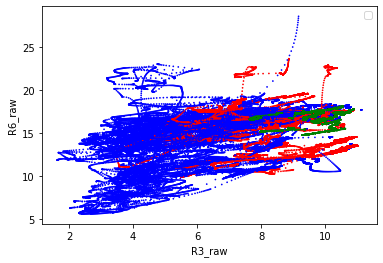

In [5]:
print_graph(2, 5)

[(2, 10), (2, 4), (2, 6), (4, 10), (4, 6), (6, 10)]


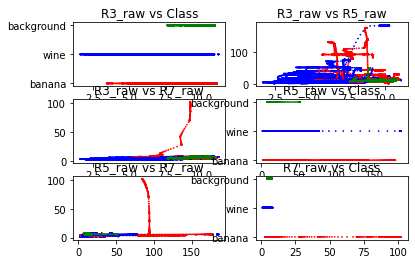

In [23]:
ats = [10, 2, 4, 6]
print_graph_all_vs_all(ats)

[(10, 2), (10, 4), (10, 6), (10, 8)]


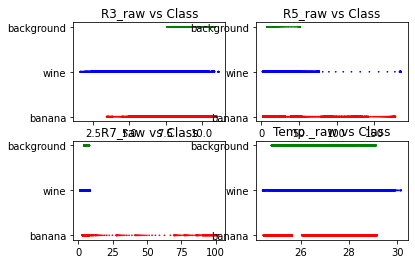

In [29]:
print_graph_one_vs_all(10, [2, 4, 6, 8])

[(10, 1), (10, 3), (10, 5), (10, 7)]


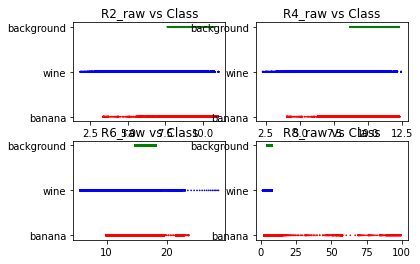

In [30]:
print_graph_one_vs_all(10, [1, 3, 5, 7])